# Import Data and Libraries


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Perform EDA



## Cleaning data

In [22]:
df = pd.read_csv("adult.data")
df.columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country","is_over_50k"]

df["is_over_50k"] = df["is_over_50k"].str.strip().eq(">50K")

## Basic statistics and information

In [23]:
print(df.head())
print(df.info())
print(df.describe())

   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  is_over_50k  
0             0             0              13   United-States  

## Plot relationship between race, sex, and income

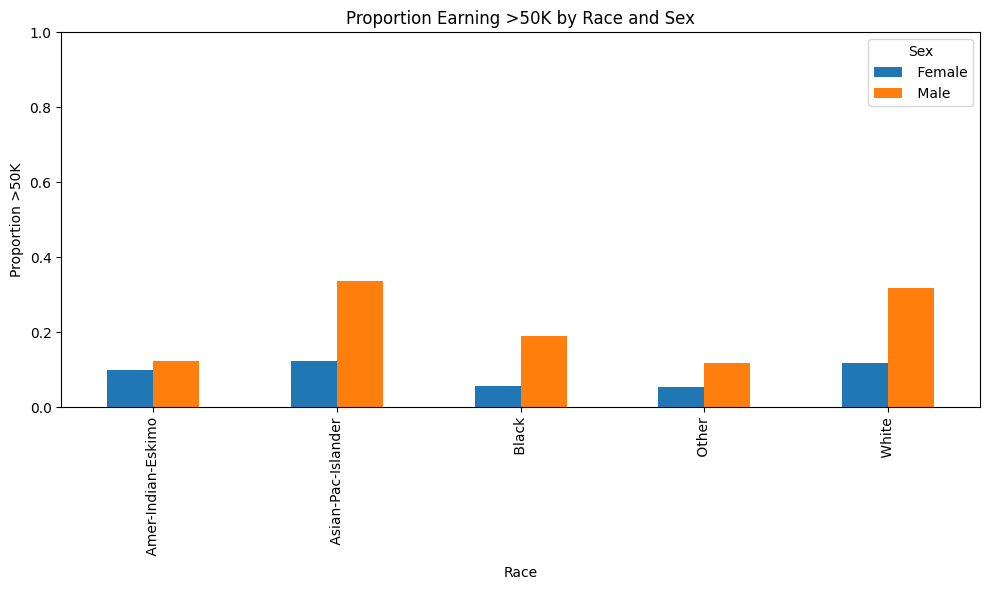

In [24]:
income_by_race_sex = df.groupby(["race", "sex"])["is_over_50k"].mean().unstack()
income_by_race_sex.plot(kind="bar", figsize=(10,6))
plt.title("Proportion Earning >50K by Race and Sex")
plt.xlabel("Race")
plt.ylabel("Proportion >50K")
plt.ylim(0, 1)
plt.legend(title="Sex")
plt.tight_layout()
plt.savefig("race_sex_income.png", dpi=200, bbox_inches="tight")
plt.show(block=True)


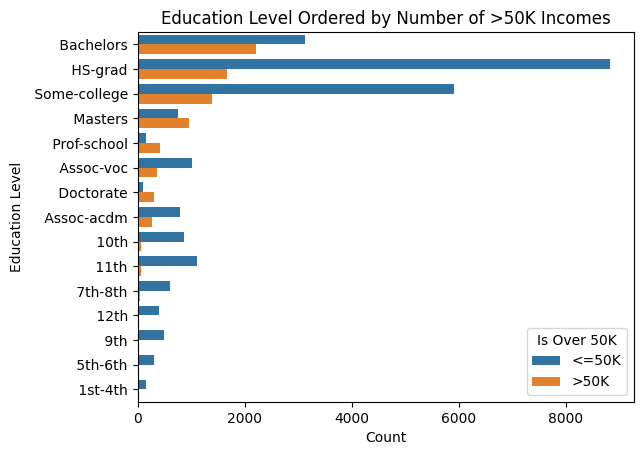

In [25]:

# Calculate the number of True values per education level
education_order = (
    df[df['is_over_50k'] == True]['education']
    .value_counts()
    .sort_values(ascending=False)
    .index
)

# Plot the countplot with that order
sns.countplot(
    y='education',
    hue='is_over_50k',
    data=df,
    order=education_order
)

plt.title("Education Level Ordered by Number of >50K Incomes")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Is Over 50K", labels=["<=50K", ">50K"])
plt.show()

# Formulate Hypotheses


### Education and Income Hypothesis


Hypothesis:
Individuals with higher education levels are more likely to earn over $50k a year.


### Gender and Income Hypothesis


Hypothesis:
Males are more likely than females to earn over $50K.


### Race and Income Hypothesis


Hypothesis:
The likelihood of earning over $50K differs significantly among racial groups.


### Education and Income Hypothesis


In [26]:

print("Education vs Income")
contingency_edu = pd.crosstab(df['education'], df['is_over_50k'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_edu)
print(f"Chi-square statistic: {chi2:.3f}, p-value: {p:.5f}")
print("--------------------------")


print("Gender vs Income")
contingency_gender = pd.crosstab(df['sex'], df['is_over_50k'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_gender)
print(f"Chi-square statistic: {chi2:.3f}, p-value: {p:.5f}")


print("--------------------------")


print("Race vs Income")
contingency_race = pd.crosstab(df['race'], df['is_over_50k'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_race)
print(f"Chi-square statistic: {chi2:.3f}, p-value: {p:.5f}")




Education vs Income
Chi-square statistic: 4430.184, p-value: 0.00000
--------------------------
Gender vs Income
Chi-square statistic: 1517.976, p-value: 0.00000
--------------------------
Race vs Income
Chi-square statistic: 330.954, p-value: 0.00000


# Test Your Hypotheses




### Why Chi Squared?


For all of these variables (Income, Educaiton, Race, and Gender), chi squared test of independence was run because all of them because they are all categorical variables.


### Outcome


The outcome for all tests were that the p-values was nearly 0.


### Interpretation


This can be interpreted as that each relationship is statistically significant and there are strong relationships between race and income, gender and income, and education level and income.

